In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.stats import sem

In [2]:
RES_DIR = "/home/users/nclkong/documents/eeg_analyses/eeg_reliability/reliability/results/"
# DATE = "31Jul19"
DATE = "08Aug19"

## Across Trials

In [3]:
rel_trials_k = scipy.io.loadmat(RES_DIR + "rel_trials_k_16_{}.mat".format(DATE))["rel_trials"].mean(axis=(0,2))
sk = np.std(scipy.io.loadmat(RES_DIR + "rel_trials_k_16_{}.mat".format(DATE))["rel_trials"].mean(axis=(2)), axis=0)

rel_trials_p = scipy.io.loadmat(RES_DIR + "rel_trials_p_16_{}.mat".format(DATE))["rel_trials"].mean(axis=(0,2))
sp = np.std(scipy.io.loadmat(RES_DIR + "rel_trials_p_16_{}.mat".format(DATE))["rel_trials"].mean(axis=(2)), axis=0)

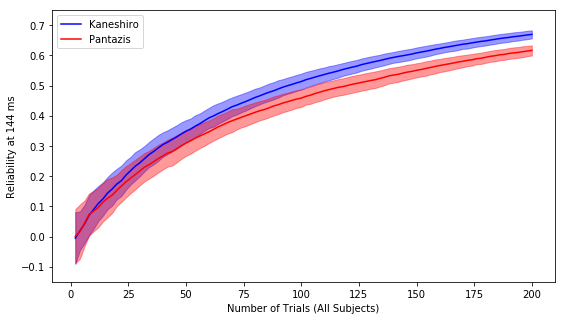

In [4]:
trials = (np.arange(100)+1)*2

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.set_ylim([-0.15,0.75])

plt.plot(trials, rel_trials_k, color='blue', label="Kaneshiro")
ax.fill_between(trials, rel_trials_k+sk, rel_trials_k-sk, color='blue', alpha=0.4)
plt.plot(trials, rel_trials_p, color='red', label="Pantazis")
ax.fill_between(trials, rel_trials_p+sp, rel_trials_p-sp, color='red', alpha=0.4)

plt.xlabel("Number of Trials (All Subjects)")
plt.ylabel("Reliability at 144 ms")
plt.legend(loc='upper left')

## Across Time Per Subject

In [5]:
rel_time_k = scipy.io.loadmat(RES_DIR + "all_subj_k_{}.mat".format(DATE))["all_subj"].mean(axis=(0,1,3))
s = sem(scipy.io.loadmat(RES_DIR + "all_subj_k_{}.mat".format(DATE))["all_subj"].mean(axis=(1,3)), axis=0)

rel_time_p = scipy.io.loadmat(RES_DIR + "all_subj_p_{}.mat".format(DATE))["all_subj"].mean(axis=(0,1,3))
sp = sem(scipy.io.loadmat(RES_DIR + "all_subj_p_{}.mat".format(DATE))["all_subj"].mean(axis=(1,3)), axis=0)

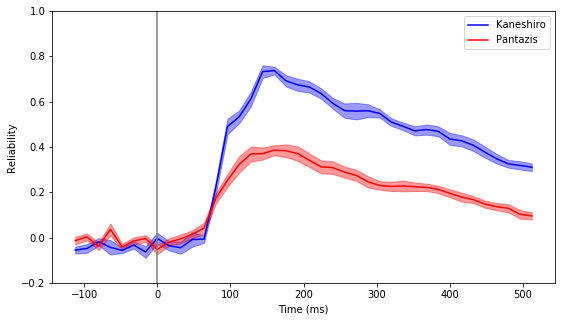

In [6]:
time = np.linspace(-112,16*32,40)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.set_ylim([-0.2,1.0])

plt.plot(time, rel_time_k, color='blue', label="Kaneshiro")
ax.fill_between(time, rel_time_k+s, rel_time_k-s, color='blue', alpha=0.4)
plt.plot(time, rel_time_p, color='red', label="Pantazis")
ax.fill_between(time, rel_time_p+sp, rel_time_p-sp, color='red', alpha=0.4)

plt.xlabel("Time (ms)")
plt.ylabel("Reliability")
plt.legend()
plt.axvline(0, color="grey")